In [5]:
import sys
sys.path.append('../')

import networkx as nx

In [10]:
from modules.load_molecules import LoadMolecule
from modules.molecular_graph import MolecularGraph
from modules.conflict_graph import ConflictGraph
from solve_qubo import SolveQUBO

### Instantiate mol loader

In [3]:
path_terpenoids = '..\..\Hijos%20de%20Rivera\Datos\\terpenoids_clean'
loader = LoadMolecule(path_terpenoids)

77 molecules available in ..\..\Hijos%20de%20Rivera\Datos\terpenoids_clean


You can now load all molecules listed in `loader.available_molecules`.

For instance, let's load menthol.

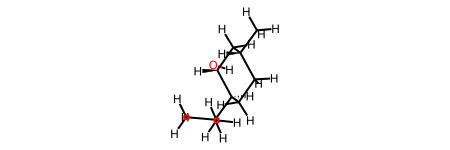

In [4]:
menthol = loader.load('menthol_bs_biblio_ob')
menthol

From this, we can directly create the corresponding molecular graph. To reduce its size and decrease the number of needed qubits, we will use the collapse rings approximation.

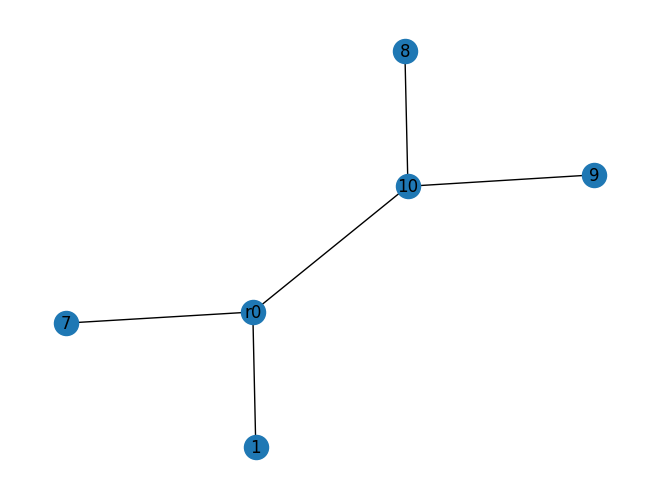

In [7]:
collapse_rings = True
menthol_graph = MolecularGraph(menthol,mol_name='menthol_bs_biblio_ob',collapse_rings=collapse_rings)
nx.draw(menthol_graph.mol_graph,with_labels=True)

Let's pick another molecule, generate its molecular graph and finally build the conflict graph associated with the 2 molecules

In [8]:
mol = loader.load('CID_335_o-cresol')
mol_graph = MolecularGraph(mol,mol_name='CID_335_o-cresol',collapse_rings=collapse_rings)

In [9]:
conflict_g = ConflictGraph(menthol_graph,mol_graph)

With this we have everything we need to run the comparison between the two molecules.

In [11]:
n_layers = 2
factor = 2
solver_type = 'GateQPU'
solver = SolveQUBO(conflict_g=conflict_g,solver_type=solver_type,factor=float(factor),
                                n_layers=n_layers)

You may now visualize the circuit

In [14]:
solver.qaoa.pqc.draw()

┌───┐       ┌──────────────┐               ┌──────────────┐       »
   q_0: ┤ H ├───────┤ Rz(1.0*θ[0]) ├───────────────┤ Rx(2.0*θ[2]) ├───────»
        ├───┤┌──────┴──────────────┴──────┐┌───────┴──────────────┴──────┐»
   q_1: ┤ H ├┤ Rz(0.999999997799135*θ[0]) ├┤ Rz(-0.999999997799135*θ[0]) ├»
        ├───┤├────────────────────────────┤├─────────────────────────────┤»
   q_2: ┤ H ├┤ Rz(0.999999997799135*θ[0]) ├┤ Rz(-0.999999997799135*θ[0]) ├»
        ├───┤├────────────────────────────┤├─────────────────────────────┤»
   q_3: ┤ H ├┤ Rz(0.999999997799135*θ[0]) ├┤ Rz(-0.999999997799135*θ[0]) ├»
        ├───┤├────────────────────────────┤├─────────────────────────────┤»
   q_4: ┤ H ├┤ Rz(0.707289667434464*θ[0]) ├┤ Rz(-0.707289667434464*θ[0]) ├»
        └───┘└────────────────────────────┘└─────────────────────────────┘»
meas: 5/══════════════════════════════════════════════════════════════════»
                                                                          »
«               ┌──────────────┐              ┌──────────────┐       »
«   q_0: ───────┤ Rz(1.0*θ[1]) ├──────────────┤ Rx(2.0*θ[7]) ├───────»
«               └──────────────┘      ┌───────┴──────────────┴──────┐»
«   q_1: ─■───────────────────────────┤ Rz(-0.999999997799135*θ[0]) ├»
«         │ZZ(0.999999997799135*θ[0]) ├─────────────────────────────┤»
«   q_2: ─■───────────────────────────┤ Rz(-0.999999997799135*θ[0]) ├»
«                                     └─────────────────────────────┘»
«   q_3: ────────────────────────────────────────────────────────────»
«                                                                    »
«   q_4: ────────────────────────────────────────────────────────────»
«                                                                    »
«meas: 5/════════════════════════════════════════════════════════════»
«                                                                    »
«                                                                    »
«   q_0: ────────────────────────────────────────────────────────────»
«                                     ┌─────────────────────────────┐»
«   q_1: ─■───────────────────────────┤ Rz(-0.707289667434464*θ[0]) ├»
«         │                           └─────────────────────────────┘»
«   q_2: ─┼──────────────────────────────────────────────────────────»
«         │ZZ(0.999999997799135*θ[0]) ┌─────────────────────────────┐»
«   q_3: ─■───────────────────────────┤ Rz(-0.999999997799135*θ[0]) ├»
«                                     └─────────────────────────────┘»
«   q_4: ────────────────────────────────────────────────────────────»
«                                                                    »
«meas: 5/════════════════════════════════════════════════════════════»
«                                                                    »
«                                                                    »
«   q_0: ────────────────────────────────────────────────────────────»
«                                             ┌──────────────┐       »
«   q_1: ─■───────────────────────────────────┤ Rx(2.0*θ[3]) ├───────»
«         │                                   └──────────────┘       »
«   q_2: ─┼─────────────────────────────■────────────────────────────»
«         │                             │ZZ(0.999999997799135*θ[0])  »
«   q_3: ─┼─────────────────────────────■────────────────────────────»
«         │ZZ(0.707289667434464*θ[0]) ┌─────────────────────────────┐»
«   q_4: ─■───────────────────────────┤ Rz(-0.707289667434464*θ[0]) ├»
«                                     └─────────────────────────────┘»
«meas: 5/════════════════════════════════════════════════════════════»
«                                                                    »
«                                                                      »
«   q_0: ──────────────────────────────────────────────────────────────»
«         ┌────────────────────────────┐┌─────────────────────────────┐»
«   q_1: ─┤ Rz(0.999999997799135

In [15]:
from qiskit_aer import AerSimulator

In [16]:
backend = AerSimulator()
n_shots = 10000
backend.shots = n_shots

tol_DE = 0.0001
maxiter_DE = 2
        
res_DE, solution, counts, best_individual = solver.solve_qubo(backend=backend, 
                                                              n_shots = n_shots, 
                                                              tol = tol_DE, maxiter = maxiter_DE)

differential_evolution step 1: f(x)= -6.974154195320241
differential_evolution step 2: f(x)= -6.974154195320241


## Running the full comparison
With the functions provided in `main.py`, you can compare easily all molecules present in the database with menthol, and get time metrics.